In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset   #To convert our dataframe into an array, we just store the values of df (by accessing df.values) into the variable ‘dataset’.

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]  # what happened here?

In [7]:
Y = dataset[:,10]  #We then assign the last column of our array to Y

In [8]:
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5) 
# we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


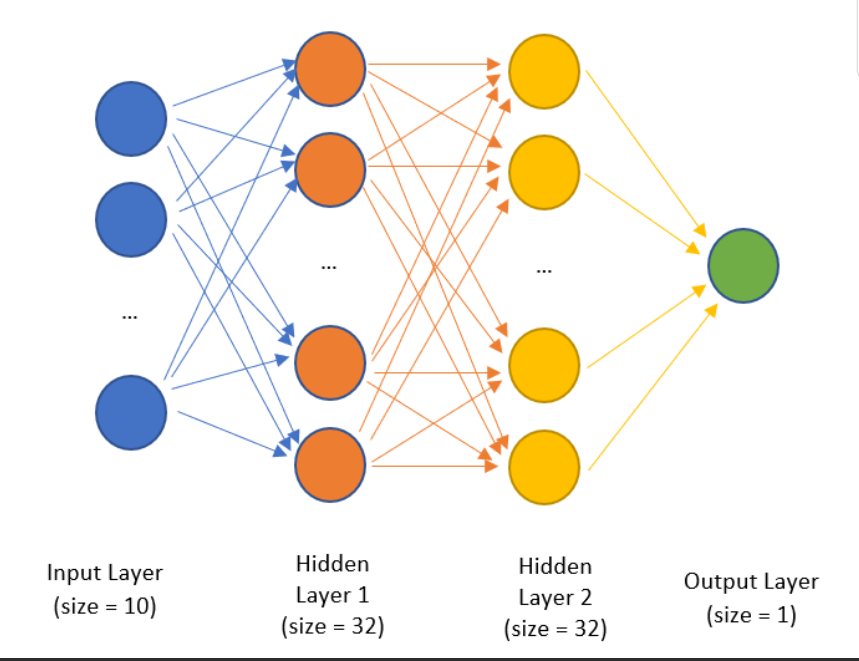

In [16]:
from IPython.display import Image
Image(filename='yourNNmodel.png') 

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(10,)),  #(10+1)/2
    Dense(12, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [19]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [20]:
model.compile(optimizer='adam',  #sgd’ refers to stochastic gradient descent (over here, it refers to mini-batch gradient descent),
              loss='binary_crossentropy', #The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
              metrics=['accuracy'])  #we want to track accuracy on top of the loss function.

In [21]:
result = model.fit(X_train, Y_train,
          batch_size=32, epochs=100, # these parameters can significantly change your accuracy.
          validation_data=(X_val, Y_val))



Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6630 - accuracy: 0.6321 - val_loss: 0.6283 - val_accuracy: 0.6941
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.7554 - val_loss: 0.5462 - val_accuracy: 0.7397
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4799 - accuracy: 0.8121 - val_loss: 0.4789 - val_accuracy: 0.7763
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8376 - val_loss: 0.4452 - val_accuracy: 0.8082
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3594 - accuracy: 0.8366 - val_loss: 0.4503 - val_accuracy: 0.7763
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8532 - val_loss: 0.4227 - val_accuracy: 0.7991
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3188 - accuracy: 0.8689 - val_loss: 0.4014 - val_accuracy: 0.8219
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9149 - val_loss: 0.2951 - val_accuracy: 0.8493
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9159 - val_loss: 0.2893 - val_accuracy: 0.8447
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9168 - val_loss: 0.2926 - val_accuracy: 0.8539
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9207 - val_loss: 0.2932 - val_accuracy: 0.8584
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.9188 - val_loss: 0.2990 - val_accuracy: 0.8493
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9217 - val_loss: 0.3007 - val_accuracy: 0.8493
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.9139 - val_loss: 0.2981 - val_accuracy: 0.8584
Epoch 

# Visualization

In [22]:
import matplotlib.pyplot as plt

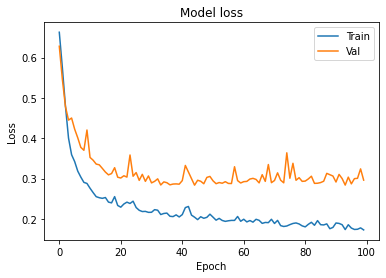

In [23]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

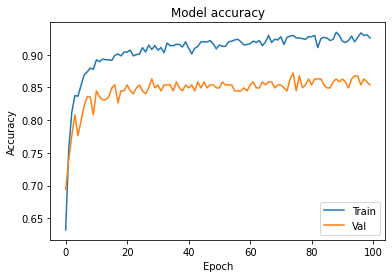

In [24]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## CHAPTER 2 ADDING REGULARIZATION AND DEALING WITH OVERFITTING

In [25]:
model_2 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
   
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=16, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
64/64 [==============================] - 1s 4ms/step - loss: 0.6587 - accuracy: 0.6585 - val_loss: 0.6166 - val_accuracy: 0.6941
Epoch 2/100
64/64 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.8151 - val_loss: 0.4579 - val_accuracy: 0.7808
Epoch 3/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8620 - val_loss: 0.3906 - val_accuracy: 0.8356
Epoch 4/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8718 - val_loss: 0.3841 - val_accuracy: 0.8265
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8757 - val_loss: 0.3573 - val_accuracy: 0.8493
Epoch 6/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8855 - val_loss: 0.3359 - val_accuracy: 0.8584
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8904 - val_loss: 0.3348 - val_accuracy: 0.8447
Epoch 8/100
6

Epoch 59/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.9247 - val_loss: 0.3011 - val_accuracy: 0.8630
Epoch 60/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9237 - val_loss: 0.3007 - val_accuracy: 0.8676
Epoch 61/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.9159 - val_loss: 0.2947 - val_accuracy: 0.8676
Epoch 62/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.9168 - val_loss: 0.2957 - val_accuracy: 0.8767
Epoch 63/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9139 - val_loss: 0.3296 - val_accuracy: 0.8539
Epoch 64/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.9266 - val_loss: 0.3275 - val_accuracy: 0.8630
Epoch 65/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9237 - val_loss: 0.3009 - val_accuracy: 0.8539
Epoch 

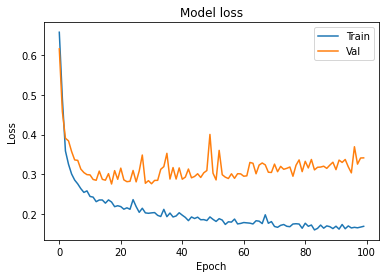

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

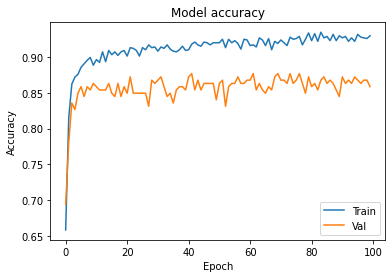

In [27]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

 L2 regularization and dropout: why?
 This is a clear sign of over-fitting. The training loss is decreasing, but the validation loss is way above the training loss and increasing. high variance means you might be having overfitting scenario.

In [28]:
from keras.layers import Dropout
from keras import regularizers

In [29]:
model_3 = Sequential([
    Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.1), input_shape=(10,)), 
    
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    #Dropout(0.1),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.1)),
])

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=64, epochs=200,
          validation_data=(X_val, Y_val))

Epoch 1/200
16/16 [==============================] - 1s 18ms/step - loss: 3.3645 - accuracy: 0.4961 - val_loss: 3.2064 - val_accuracy: 0.5297
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 3.0772 - accuracy: 0.6106 - val_loss: 2.9354 - val_accuracy: 0.7260
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 2.8186 - accuracy: 0.7906 - val_loss: 2.6920 - val_accuracy: 0.7763
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 2.5864 - accuracy: 0.7896 - val_loss: 2.4734 - val_accuracy: 0.7534
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 2.3785 - accuracy: 0.7427 - val_loss: 2.2774 - val_accuracy: 0.6895
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 2.1923 - accuracy: 0.6928 - val_loss: 2.1019 - val_accuracy: 0.6301
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 2.0256 - accuracy: 0.6800 - val_loss: 1.9447 - val_accuracy: 0.6347
Epoch 8/200


Epoch 59/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5039 - val_loss: 0.6943 - val_accuracy: 0.4749
Epoch 60/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5039 - val_loss: 0.6942 - val_accuracy: 0.4749
Epoch 61/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5039 - val_loss: 0.6941 - val_accuracy: 0.4749
Epoch 62/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5039 - val_loss: 0.6940 - val_accuracy: 0.4749
Epoch 63/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5039 - val_loss: 0.6939 - val_accuracy: 0.4749
Epoch 64/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5039 - val_loss: 0.6939 - val_accuracy: 0.4749
Epoch 65/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5039 - val_loss: 0.6939 - val_accuracy: 0.4749
Epoch 

16/16 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.4749
Epoch 117/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.4749
Epoch 118/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.4749
Epoch 119/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.4749
Epoch 120/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.4749
Epoch 121/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6935 - val_accuracy: 0.4749
Epoch 122/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.4749
Epoch 123/200

16/16 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6935 - val_accuracy: 0.4749
Epoch 174/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6935 - val_accuracy: 0.4749
Epoch 175/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.4749
Epoch 176/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.4749
Epoch 177/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.4749
Epoch 178/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6936 - val_accuracy: 0.4749
Epoch 179/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6935 - val_accuracy: 0.4749
Epoch 180/200

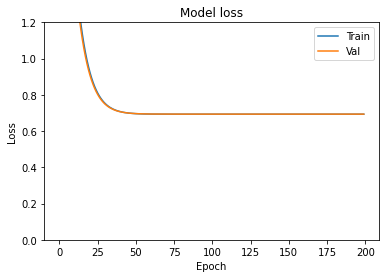

In [31]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

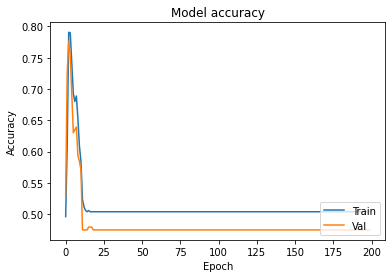

In [32]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

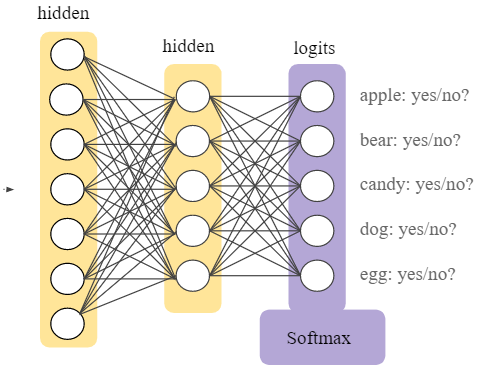

In [33]:
from IPython.display import Image
Image(filename='softmax1.png')

In [34]:
# rectified linear function
def rectified(x):
    return max(0.0, x)

In [35]:
# demonstrate the rectified linear function
 
# rectified linear function
def rectified(x):
    return max(0.0, x)
 
# demonstrate with a positive input
x = 1.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
x = 1000.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
# demonstrate with a zero input
x = 0.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
# demonstrate with a negative input
x = -1.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
x = -1000.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))

rectified(1.0) is 1.0
rectified(1000.0) is 1000.0
rectified(0.0) is 0.0
rectified(-1.0) is 0.0
rectified(-1000.0) is 0.0


In [36]:
#y = max(0, x)  GENERAL FORMULA OF RELU

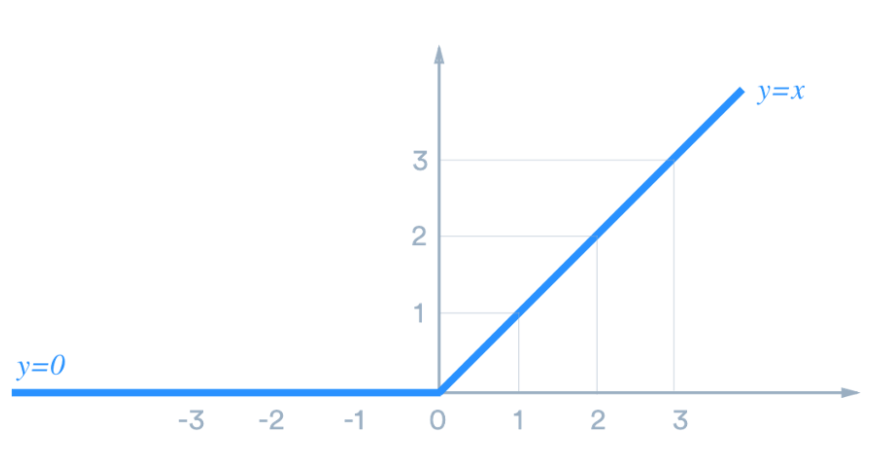

In [37]:
from IPython.display import Image
Image(filename='RELLU1.png')